<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/N_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [3]:
uploaded = files.upload()   

Saving coloradoRiver.txt to coloradoRiver.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))

In [5]:
uploaded = files.upload()

Saving coloradoRiver_ARIMA.txt to coloradoRiver_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['coloradoRiver_ARIMA.txt']))

In [7]:
uploaded = files.upload()

Saving coloradoRiver_r.txt to coloradoRiver_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['coloradoRiver_r.txt']))

In [9]:
data_r.describe()

,Residuo
count,744.000000
mean,-0.118830
std,0.970548
min,-4.314714
25%,-0.568110
50%,-0.350432
75%,0.093252
max,5.365810


Original time series:



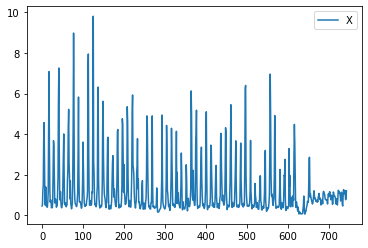

In [10]:
print('Original time series:\n')
data.plot()

Residuals over time:



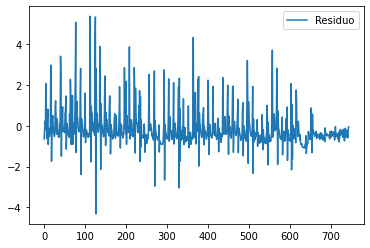

In [11]:
print('Residuals over time:\n')
data_r.plot()

In [12]:
len(data)

744

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [14]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.378795       NaN       NaN  ...       NaN       NaN       NaN
1    0.419852  0.378795       NaN  ...       NaN       NaN       NaN
2    0.468420  0.419852  0.378795  ...       NaN       NaN       NaN
3    0.430527  0.468420  0.419852  ...       NaN       NaN       NaN
4    0.659699  0.430527  0.468420  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
739  0.423610  0.422480  0.388125  ...  0.388466  0.405550  0.406346
740  0.409889  0.423610  0.422480  ...  0.428060  0.388466  0.405550
741  0.384481  0.409889  0.423610  ...  0.421167  0.428060  0.388466
742  0.418838  0.384481  0.409889  ...  0.394989  0.421167  0.428060
743  0.441343  0.418838  0.384481  ...  0.369361  0.394989  0.421167

[744 rows x 13 columns]


In [15]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3128, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.4366, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


129
100
503


In [16]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

        ARIMA     ARIMA     ARIMA  ...     ARIMA     ARIMA     ARIMA
0    1.107782       NaN       NaN  ...       NaN       NaN       NaN
1    0.780329  1.107782       NaN  ...       NaN       NaN       NaN
2    1.020163  0.780329  1.107782  ...       NaN       NaN       NaN
3    1.626990  1.020163  0.780329  ...       NaN       NaN       NaN
4    1.618485  1.626990  1.020163  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
739  1.443947  1.334886  1.607458  ...  1.264157  1.338776  1.451075
740  1.486771  1.443947  1.334886  ...  1.100866  1.264157  1.338776
741  1.362737  1.486771  1.443947  ...  1.377601  1.100866  1.264157
742  1.080139  1.362737  1.486771  ...  1.471009  1.377601  1.100866
743  1.252280  1.080139  1.362737  ...  1.279104  1.471009  1.377601

[744 rows x 13 columns]


In [17]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3128, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.4366, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

129
100
503


In [18]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

        X     X     X     X     X     X  ...     X     X     X     X     X     X
0    0.46   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
1    0.53  0.46   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
2    1.24  0.53  0.46   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3    1.48  1.24  0.53  0.46   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4    3.69  1.48  1.24  0.53  0.46   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
739  1.23  1.11  1.05  1.26  0.95  0.46  ...  0.98  1.14  0.93  0.71  0.95  1.07
740  1.14  1.23  1.11  1.05  1.26  0.95  ...  0.54  0.98  1.14  0.93  0.71  0.95
741  0.77  1.14  1.23  1.11  1.05  1.26  ...  0.46  0.54  0.98  1.14  0.93  0.71
742  0.82  0.77  1.14  1.23  1.11  1.05  ...  0.95  0.46  0.54  0.98  1.14  0.93
743  1.21  0.82  0.77  1.14  1.23  1.11  ...  1.26  0.95  0.46  0.54  0.98  1.14

[744 rows x 13 columns]


In [19]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3128, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.4366, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

129
100
503


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    mse_residuals_val = []
    final_experiment_predictions = []
    final_experiment_predictions_val = []

    last_configurations = []
    
    average_particles = []
    average_particles_val = []
    mse_averages = []
    mse_averages_val = []
    final_experiment_averages = []
    final_experiment_averages_val = []

    median_particles = []
    median_particles_val = []
    mse_medians = []
    mse_medians_val = []
    final_experiment_medians = []
    final_experiment_medians_val = []

    average_k_best_predictions = []
    average_k_best_predictions_val = []
    mse_averages_k_best = []
    mse_averages_k_best_val = []
    final_experiment_k_averages = []
    final_experiment_k_averages_val = []

    median_k_best_predictions = []
    median_k_best_predictions_val = []
    mse_medians_k_best = []
    mse_medians_k_best_val = []
    final_experiment_k_medians = []
    final_experiment_k_medians_val = []

    mse_ARIMA = []
    mse_ARIMA_val = []
    
    mse_ensemble = []
    mse_ensemble_val = []

    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_val = g_best_RGS.predict(X_val)
        
        predict_test = g_best_RGS.predict(X_test)

     
        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

      
        mse_r_val = mean_squared_error(y_val, predict_val)
        mse_r = mean_squared_error(y_test, predict_test)
        
   
        mse_residuals_val.append(mse_r_val)
        mse_residuals.append(mse_r)

       
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val = particles_last_predictions(c, n_particles, k, X_val, y_val)
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k, X_test, y_test)
       
        average_particles_val.append(average_p_val)
        median_particles_val.append(median_p_val)
        average_k_best_predictions_val.append(av_k_best_p_val)
        median_k_best_predictions_val.append(md_k_best_p_val)
             
        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
       
        mse_e_val, mse_AR_val = residual_performance(predict_val, y_val_ARIMA, y_val_raw)
       
        mse_e, mse_AR = residual_performance(predict_test, y_test_ARIMA, y_test_raw)
       
        # Storing the Ensemble's (final system) mse
        mse_ARIMA_val.append(mse_AR_val)
        mse_ensemble_val.append(mse_e_val)
        
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)
     
        # Storing the mse of the average predictions
        mse_A_val, mse_AR_val = residual_performance(average_p_val, y_val_ARIMA, y_val_raw)
        mse_A, mse_AR = residual_performance(average_p, y_test_ARIMA, y_test_raw)
   
        mse_averages_val.append(mse_A_val)
        mse_averages.append(mse_A)
       
        # Storing the mse of the average k best predictions
        mse_A_k_best_val, mse_AR_val = residual_performance(av_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_test_ARIMA, y_test_raw)
        
        mse_averages_k_best_val.append(mse_A_k_best_val)
        mse_averages_k_best.append(mse_A_k_best)
        
        # Storing the mse of the median predictions
        mse_M_val, mse_AR_val = residual_performance(median_p_val, y_val_ARIMA, y_val_raw)
        mse_M, mse_AR = residual_performance(median_p, y_test_ARIMA, y_test_raw)
        
        mse_medians_val.append(mse_M_val)
        mse_medians.append(mse_M)
        
        # Storing the mse of the median k best predictions
        mse_M_k_best_val, mse_AR_val = residual_performance(md_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_test_ARIMA, y_test_raw)
      
        mse_medians_k_best_val.append(mse_M_k_best_val)
        mse_medians_k_best.append(mse_M_k_best)
      
        # Getting the final results of the current experiment
        # and storing them
        final_exp_p_val, final_exp_av_val, final_exp_md_val, final_exp_av_k_val, final_exp_md_k_val = results(g_best_RGS, average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val, y_val_raw, y_val_ARIMA, X_val)
               

        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p, y_test_raw, y_test_ARIMA, X_test)
        
     

        final_exp_p_val = final_exp_p_val.tolist()
        final_exp_av_val = final_exp_av_val.tolist()
        final_exp_md_val = final_exp_md_val.tolist()
        final_exp_av_k_val = final_exp_av_k_val.tolist()
        final_exp_md_k_val = final_exp_md_k_val.tolist()
     
        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()
      
                
        final_experiment_predictions_val.append(final_exp_p_val)
        final_experiment_averages_val.append(final_exp_av_val)
        final_experiment_medians_val.append(final_exp_md_val)
        final_experiment_k_averages_val.append(final_exp_av_k_val)
        final_experiment_k_medians_val.append(final_exp_md_k_val)
     
        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)
      
        print('\nExperiment # %d: done. MSE_g_Best_val: %f; MSE_AV_val: %f; MSE_MD_val: %f; MSE_k_AV_val: %f; MSE_k_MD_val: %f\n'%(e+1, mse_e_val, mse_A_val, mse_M_val, mse_A_k_best_val,mse_M_k_best_val))
        print('\nMSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 
                                                                             
                                                                              

    aux_result_1_val = np.argmin(mse_ensemble_val)
    aux_result_1 = np.argmin(mse_ensemble)

    mse_final_val = mse_ensemble_val[aux_result_1_val]
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2_val = np.argmin(mse_residuals_val)
    aux_result_2 = np.argmin(mse_residuals)

    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions_val = final_experiment_predictions_val[aux_result_2_val]
    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average_val = final_experiment_averages_val[aux_result_2_val]
    corresponding_average = final_experiment_averages[aux_result_2]

    corresponding_median_val = final_experiment_medians_val[aux_result_2_val]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average_val = final_experiment_k_averages_val[aux_result_2_val]
    corresponding_k_average = final_experiment_k_averages[aux_result_2]

    corresponding_k_median_val = final_experiment_k_medians_val[aux_result_2_val]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')
    print(color.BOLD + '\n Displaying Results for the validation set\n' + color.BOLD)

    display_results(best_regression, y_val_raw, y_val_ARIMA, 
                    probable_best_predictions_val, corresponding_average_val, corresponding_median_val, 
                    corresponding_k_average_val, corresponding_k_median_val,c)

    
    print(color.BOLD + '\n Displaying Results for the test set\n' + color.BOLD)
    display_results(best_regression, y_test_raw, y_test_ARIMA, 
                    probable_best_predictions, corresponding_average, corresponding_median, 
                    corresponding_k_average, corresponding_k_median,c)
                    


    
    final_experiment_predictions_val_T = list(map(list, zip(*final_experiment_predictions_val)))
    final_experiment_averages_val_T = list(map(list, zip(*final_experiment_averages_val)))
    final_experiment_medians_val_T = list(map(list, zip(*final_experiment_medians_val)))
    final_experiment_k_averages_val_T = list(map(list, zip(*final_experiment_k_averages_val)))
    final_experiment_k_medians_val_T = list(map(list, zip(*final_experiment_k_medians_val)))


    final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    
    final_experiment_predictions_concat_val = [item for sublist in final_experiment_predictions_val for item in sublist] 
    final_experiment_averages_concat_val = [item for sublist in final_experiment_averages_val for item in sublist]
    final_experiment_medians_concat_val = [item for sublist in final_experiment_medians_val for item in sublist]
    final_experiment_k_averages_concat_val = [item for sublist in final_experiment_k_averages_val for item in sublist]
    final_experiment_k_medians_concat_val = [item for sublist in final_experiment_k_medians_val for item in sublist]


    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest G-best on val set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1_val+1, mse_final_val) + color.BOLD )  

    print(color.BOLD + '\nBest G-best on test set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )


    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val_T = pd.DataFrame()
        
    final_results_val_T["Previsoes com o G_Best (Sistema Final)"] = ''
    for p in range(len(y_val)):
        final_results_val_T["G_best_" + str(p+1)] = final_experiment_predictions_val_T[p]

    final_results_val_T["Previsoes com as Medias"] = ''
    for p in range(len(y_val)):
        final_results_val_T["Av_" + str(p+1)] = final_experiment_averages_val_T[p]

    final_results_val_T["Previsoes com as Medianas"] = ''
    for p in range(len(y_val)):
        final_results_val_T["Md_" + str(p+1)] = final_experiment_medians_val_T[p]

    final_results_val_T["Previsoes com a Media das K melhores particulas"] = ''
    for p in range(len(y_val)):       
        final_results_val_T["K_Av_" + str(p+1)] = final_experiment_k_averages_val_T[p]

    final_results_val_T["Previsoes com a Mediana das K melhores particulas"] = ''
    for p in range(len(y_val)):       
        final_results_val_T["K_Md_" + str(p+1)] = final_experiment_k_medians_val_T[p]

    
    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results_T = pd.DataFrame()
        
    final_results_T["Previsoes com o G_Best (Sistema Final)"] = ''
    for p in range(len(y_test)):
        final_results_T["G_best_" + str(p+1)] = final_experiment_predictions_T[p]

    final_results_T["Previsoes com as Medias"] = ''
    for p in range(len(y_test)):
        final_results_T["Av_" + str(p+1)] = final_experiment_averages_T[p]

    final_results_T["Previsoes com as Medianas"] = ''
    for p in range(len(y_test)):
        final_results_T["Md_" + str(p+1)] = final_experiment_medians_T[p]

    final_results_T["Previsoes com a Media das K melhores particulas"] = ''
    for p in range(len(y_test)):       
        final_results_T["K_Av_" + str(p+1)] = final_experiment_k_averages_T[p]

    final_results_T["Previsoes com a Mediana das K melhores particulas"] = ''
    for p in range(len(y_test)):       
        final_results_T["K_Md_" + str(p+1)] = final_experiment_k_medians_T[p]


    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val = pd.DataFrame()
        
    final_results_val["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat_val
    final_results_val["Previsoes com as Medias"] = final_experiment_averages_concat_val
    final_results_val["Previsoes com as Medianas"] = final_experiment_medians_concat_val
    final_results_val["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat_val
    final_results_val["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat_val

    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()
        
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    

    final_mse_val = pd.DataFrame()
    
    final_mse_val["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse_val["MSE da Previsao do Sistema Final"] = mse_ensemble_val
    final_mse_val["MSE da Previsao das Medias"] = mse_averages_val
    final_mse_val["MSE da Previsao das Medianas"] = mse_medians_val
    final_mse_val["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best_val
    final_mse_val["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best_val
    final_mse_val["MSE da Previsao do ARIMA"] = mse_ARIMA_val


    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA

    final_results_val_T.to_csv("T_Val_ColoradoRiver_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results_T.to_csv("T_Test_ColoradoRiver_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results_val.to_csv("Val_ColoradoRiver_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse_val.to_csv("Val_MSE_ColoradoRiver_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results.to_csv("Test_ColoradoRiver_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Test_MSE_ColoradoRiver_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def results(regression, average, median, k_average, k_median, y_raw, y_ARIMA, X_residual):
    
    import numpy as np

    data = y_raw
    ARIMA = y_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_residual

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def display_results(configuration, y_raw, y_ARIMA,
                    final_predictions, final_predictions_average, final_predictions_median,  
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_raw
    ARIMA = y_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA, y_raw)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions, y_raw)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average, y_raw)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median, y_raw)

    print('\n')
    print('\n')

In [0]:
def plot_results(predictions, y_raw):

    plt.plot(range(len(y_raw)), y_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k, X, y):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X) 

        mse.append(mean_squared_error(y_predict, y))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

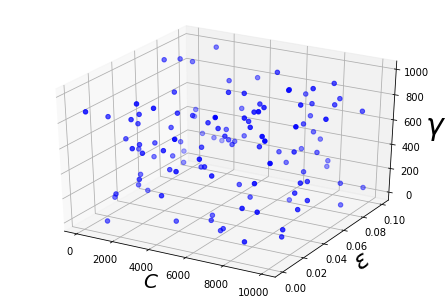






Experiment # 1: done. MSE_g_Best_val: 0.547897; MSE_AV_val: 0.553850; MSE_MD_val: 0.548267; MSE_k_AV_val: 0.548265; MSE_k_MD_val: 0.548266


MSE_g_Best: 0.082480; MSE_AV: 0.074095; MSE_MD: 0.083256; MSE_k_AV: 0.069111; MSE_k_MD: 0.071838


Experiment # 2: done. MSE_g_Best_val: 0.547939; MSE_AV_val: 0.556473; MSE_MD_val: 0.547512; MSE_k_AV_val: 0.548360; MSE_k_MD_val: 0.548360


MSE_g_Best: 0.082950; MSE_AV: 0.072064; MSE_MD: 0.081450; MSE_k_AV: 0.063696; MSE_k_MD: 0.063270


Experiment # 3: done. MSE_g_Best_val: 0.547887; MSE_AV_val: 0.598628; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.548553; MSE_k_MD_val: 0.548353


MSE_g_Best: 0.083024; MSE_AV: 0.069717; MSE_MD: 0.083006; MSE_k_AV: 0.062700; MSE_k_MD: 0.062558


Experiment # 4: done. MSE_g_Best_val: 0.542009; MSE_AV_val: 0.560446; MSE_MD_val: 0.561155; MSE_k_AV_val: 0.558436; MSE_k_MD_val: 0.557438


MSE_g_Best: 0.082655; MSE_AV: 0.091688; MSE_MD: 0.092252; MSE_k_AV: 0.079045; MSE_k_MD: 0.092252


Experiment # 5: done. MSE_g_Best_va

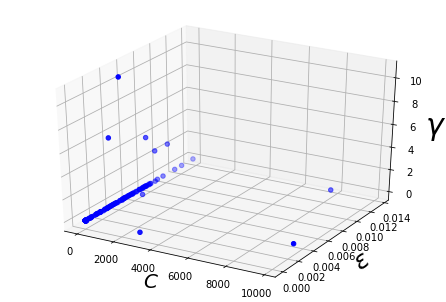






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.542009

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.560446

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.558436

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.561155

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.557438

Best Configuration Found:

SVR(C=21.16003535431606, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.00369167709299102, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



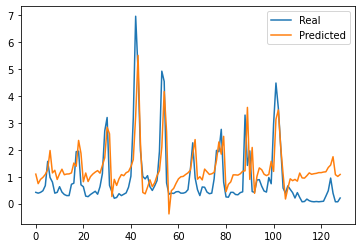


Ensemble Model series` predicitions:



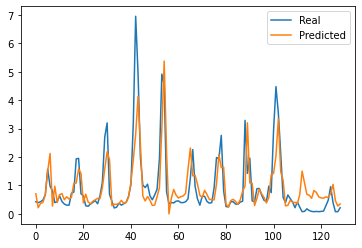


Ensemble Model best Average series` predicitions:



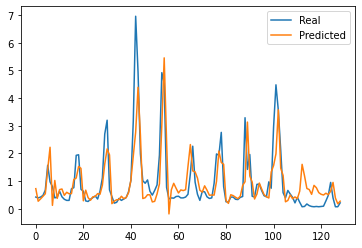


Ensemble Model K best Average series` predicitions:



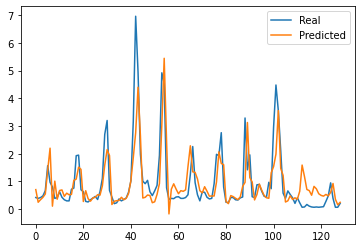


Ensemble Model best Median series` predicitions:



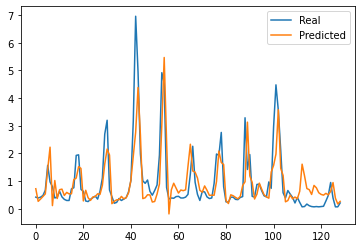


Ensemble Model K best Median series` predicitions:



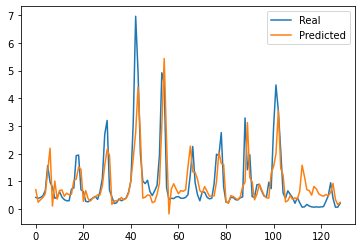






 Displaying Results for the test set



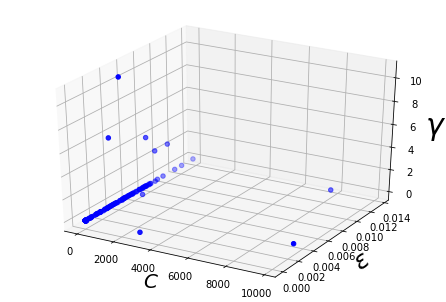






Mean Squared Error for the ARIMA Model:	 0.232631

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.080169

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.069845

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.064185

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.083019

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.063023

Best Configuration Found:

SVR(C=21.16003535431606, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.00369167709299102, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



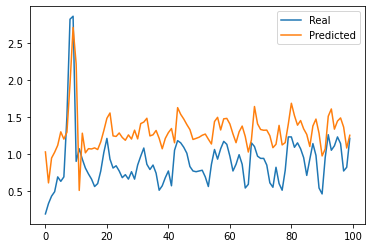


Ensemble Model series` predicitions:



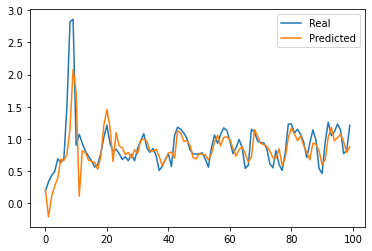


Ensemble Model best Average series` predicitions:



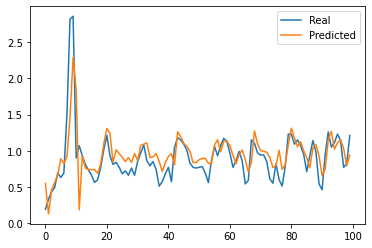


Ensemble Model K best Average series` predicitions:



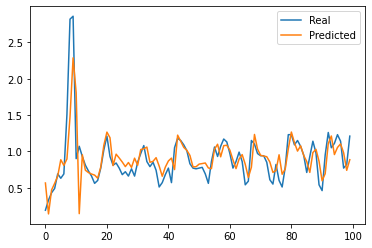


Ensemble Model best Median series` predicitions:



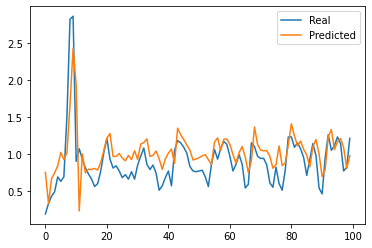


Ensemble Model K best Median series` predicitions:



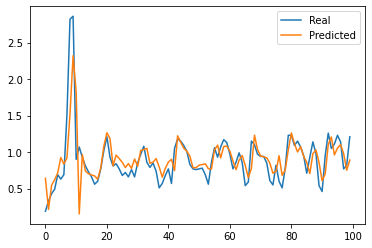






Best G-best on val set: Experiment # 4 . Mean Squared Error = 0.542009


Best G-best on test set: Experiment # 5 . Mean Squared Error = 0.080169



In [28]:
pso(120, 100, 3, 1, 5, 5)

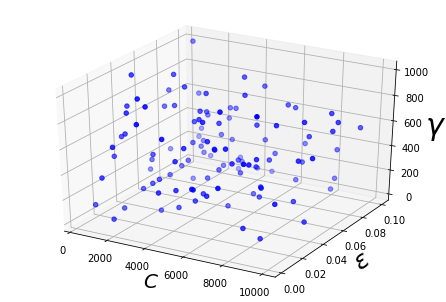






Experiment # 1: done. MSE_g_Best_val: 0.547887; MSE_AV_val: 0.603667; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.548863; MSE_k_MD_val: 0.549154


MSE_g_Best: 0.083025; MSE_AV: 0.070532; MSE_MD: 0.083006; MSE_k_AV: 0.067008; MSE_k_MD: 0.067355


Experiment # 2: done. MSE_g_Best_val: 0.547956; MSE_AV_val: 0.593747; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.548514; MSE_k_MD_val: 0.548313


MSE_g_Best: 0.082715; MSE_AV: 0.069274; MSE_MD: 0.083006; MSE_k_AV: 0.064991; MSE_k_MD: 0.064088


Experiment # 3: done. MSE_g_Best_val: 0.509118; MSE_AV_val: 0.596495; MSE_MD_val: 0.664948; MSE_k_AV_val: 0.548675; MSE_k_MD_val: 0.548708


MSE_g_Best: 0.077250; MSE_AV: 0.068570; MSE_MD: 0.082938; MSE_k_AV: 0.062923; MSE_k_MD: 0.062734


Experiment # 4: done. MSE_g_Best_val: 0.547904; MSE_AV_val: 0.570112; MSE_MD_val: 0.551382; MSE_k_AV_val: 0.548526; MSE_k_MD_val: 0.548658


MSE_g_Best: 0.083132; MSE_AV: 0.069201; MSE_MD: 0.078780; MSE_k_AV: 0.066489; MSE_k_MD: 0.067166


Experiment # 5: done. MSE_g_Best_va

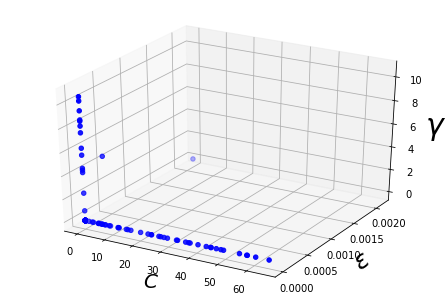






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.509118

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.596495

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548675

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.664948

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548708

Best Configuration Found:

SVR(C=11.958406393569078, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.19011980804731016, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



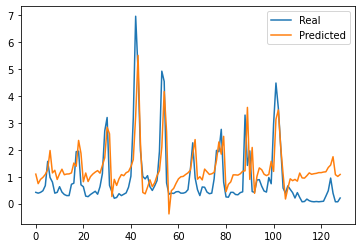


Ensemble Model series` predicitions:



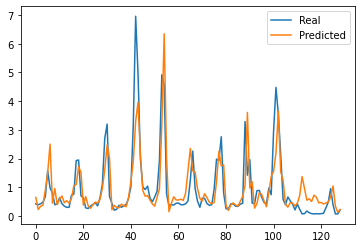


Ensemble Model best Average series` predicitions:



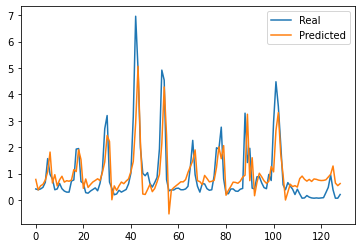


Ensemble Model K best Average series` predicitions:



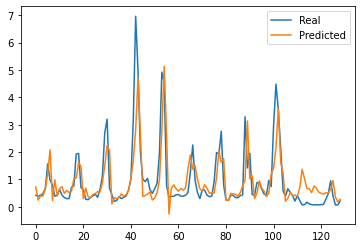


Ensemble Model best Median series` predicitions:



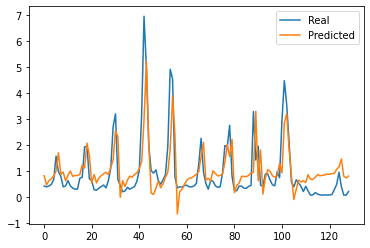


Ensemble Model K best Median series` predicitions:



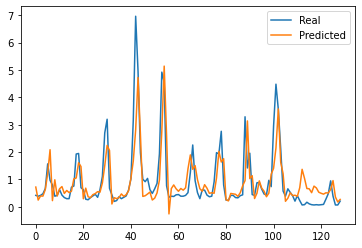






 Displaying Results for the test set



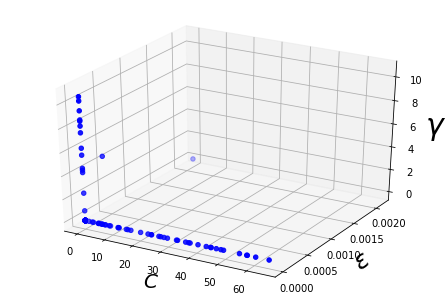






Mean Squared Error for the ARIMA Model:	 0.232631

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.077250

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.068570

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.062923

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.082938

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.062734

Best Configuration Found:

SVR(C=11.958406393569078, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.19011980804731016, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



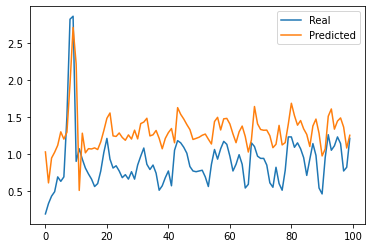


Ensemble Model series` predicitions:



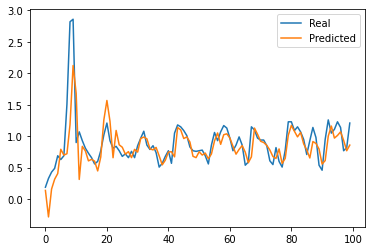


Ensemble Model best Average series` predicitions:



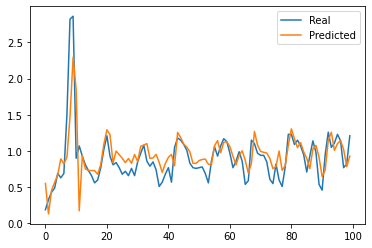


Ensemble Model K best Average series` predicitions:



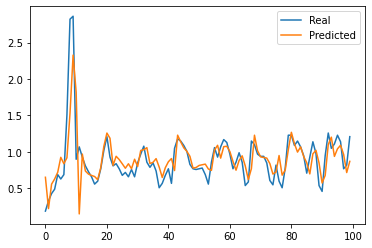


Ensemble Model best Median series` predicitions:



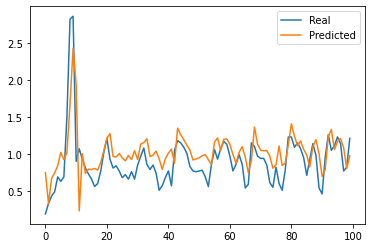


Ensemble Model K best Median series` predicitions:



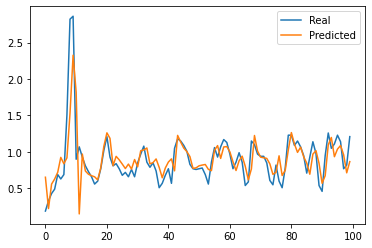






Best G-best on val set: Experiment # 3 . Mean Squared Error = 0.509118


Best G-best on test set: Experiment # 3 . Mean Squared Error = 0.077250



In [29]:
pso(120, 100, 3, 1, 10, 5)

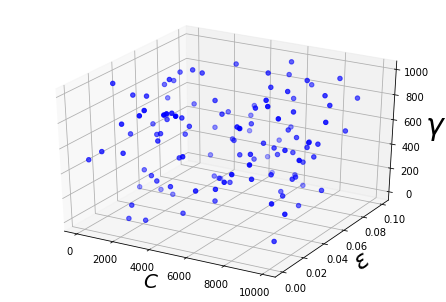






Experiment # 1: done. MSE_g_Best_val: 0.506441; MSE_AV_val: 0.604241; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.545198; MSE_k_MD_val: 0.548403


MSE_g_Best: 0.077679; MSE_AV: 0.070305; MSE_MD: 0.083006; MSE_k_AV: 0.066597; MSE_k_MD: 0.067661


Experiment # 2: done. MSE_g_Best_val: 0.547272; MSE_AV_val: 0.562767; MSE_MD_val: 0.549675; MSE_k_AV_val: 0.549199; MSE_k_MD_val: 0.548988


MSE_g_Best: 0.079277; MSE_AV: 0.070723; MSE_MD: 0.082860; MSE_k_AV: 0.070308; MSE_k_MD: 0.082752


Experiment # 3: done. MSE_g_Best_val: 0.547903; MSE_AV_val: 0.583431; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.548999; MSE_k_MD_val: 0.549051


MSE_g_Best: 0.083129; MSE_AV: 0.068908; MSE_MD: 0.083006; MSE_k_AV: 0.070223; MSE_k_MD: 0.073740


Experiment # 4: done. MSE_g_Best_val: 0.547887; MSE_AV_val: 0.566984; MSE_MD_val: 0.550087; MSE_k_AV_val: 0.548719; MSE_k_MD_val: 0.548686


MSE_g_Best: 0.083027; MSE_AV: 0.069554; MSE_MD: 0.079329; MSE_k_AV: 0.070685; MSE_k_MD: 0.076229


Experiment # 5: done. MSE_g_Best_va

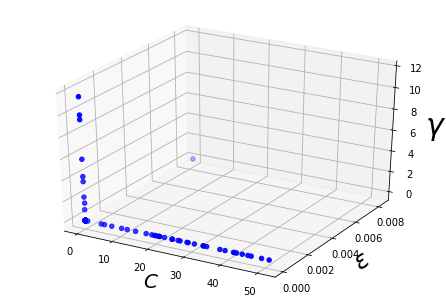






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.506441

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.604241

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.545198

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.666114

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548403

Best Configuration Found:

SVR(C=0.08375305760688077, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=1.7075773109067263, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



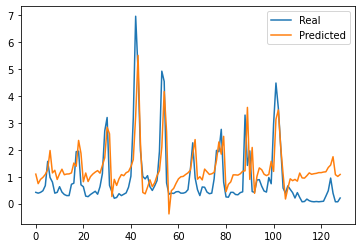


Ensemble Model series` predicitions:



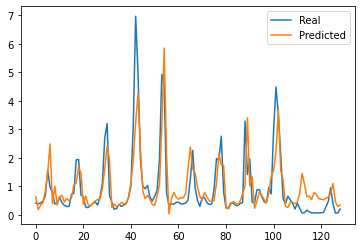


Ensemble Model best Average series` predicitions:



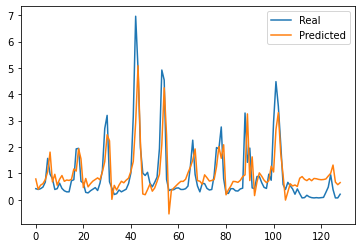


Ensemble Model K best Average series` predicitions:



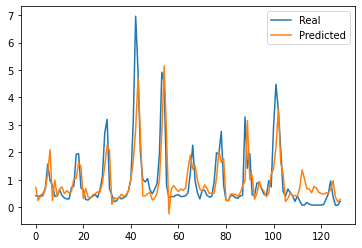


Ensemble Model best Median series` predicitions:



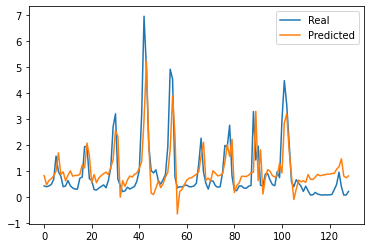


Ensemble Model K best Median series` predicitions:



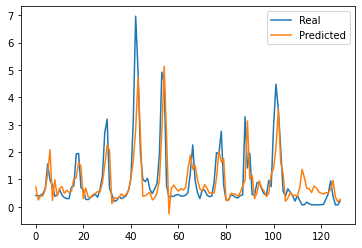






 Displaying Results for the test set



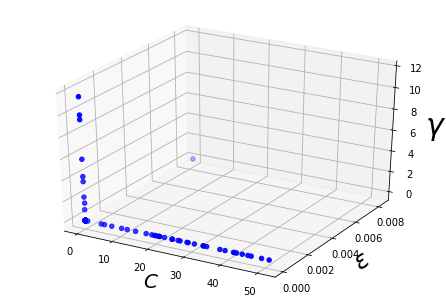






Mean Squared Error for the ARIMA Model:	 0.232631

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.077679

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.070305

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.066597

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.083006

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.067661

Best Configuration Found:

SVR(C=0.08375305760688077, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=1.7075773109067263, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



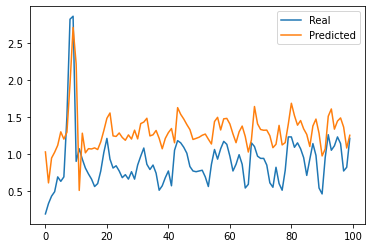


Ensemble Model series` predicitions:



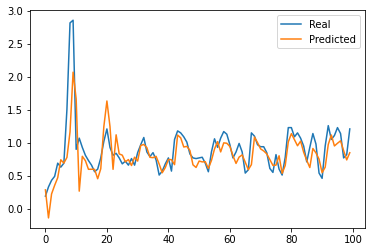


Ensemble Model best Average series` predicitions:



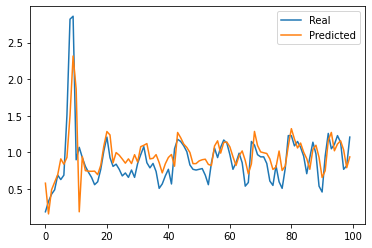


Ensemble Model K best Average series` predicitions:



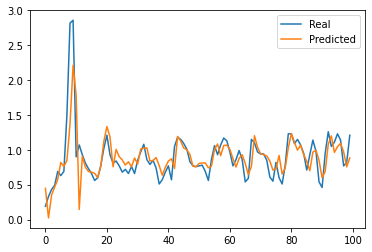


Ensemble Model best Median series` predicitions:



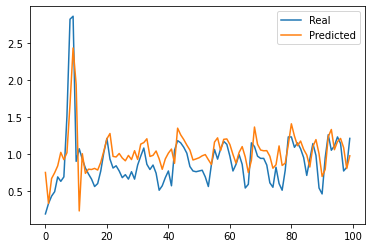


Ensemble Model K best Median series` predicitions:



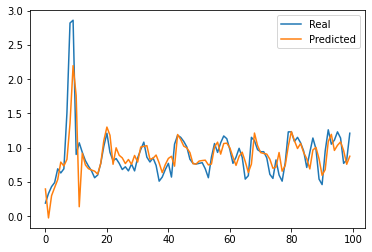






Best G-best on val set: Experiment # 1 . Mean Squared Error = 0.506441


Best G-best on test set: Experiment # 1 . Mean Squared Error = 0.077679



In [30]:
pso(120, 100, 3, 1, 20, 5)

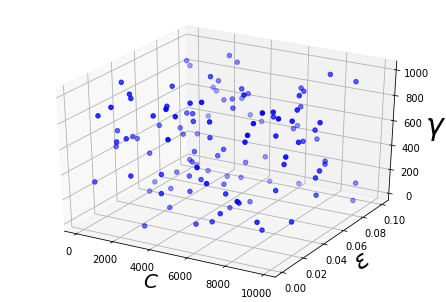






Experiment # 1: done. MSE_g_Best_val: 0.554740; MSE_AV_val: 0.558488; MSE_MD_val: 0.558470; MSE_k_AV_val: 0.556782; MSE_k_MD_val: 0.556546


MSE_g_Best: 0.093385; MSE_AV: 0.094153; MSE_MD: 0.094354; MSE_k_AV: 0.092247; MSE_k_MD: 0.092252


Experiment # 2: done. MSE_g_Best_val: 0.514696; MSE_AV_val: 0.602621; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.549567; MSE_k_MD_val: 0.548869


MSE_g_Best: 0.077790; MSE_AV: 0.070070; MSE_MD: 0.083006; MSE_k_AV: 0.066579; MSE_k_MD: 0.062285


Experiment # 3: done. MSE_g_Best_val: 0.554494; MSE_AV_val: 0.558542; MSE_MD_val: 0.558605; MSE_k_AV_val: 0.556674; MSE_k_MD_val: 0.556269


MSE_g_Best: 0.093473; MSE_AV: 0.094174; MSE_MD: 0.094289; MSE_k_AV: 0.092235; MSE_k_MD: 0.092252


Experiment # 4: done. MSE_g_Best_val: 0.508114; MSE_AV_val: 0.596621; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.543552; MSE_k_MD_val: 0.547672


MSE_g_Best: 0.076063; MSE_AV: 0.069331; MSE_MD: 0.083006; MSE_k_AV: 0.070567; MSE_k_MD: 0.078408


Experiment # 5: done. MSE_g_Best_va

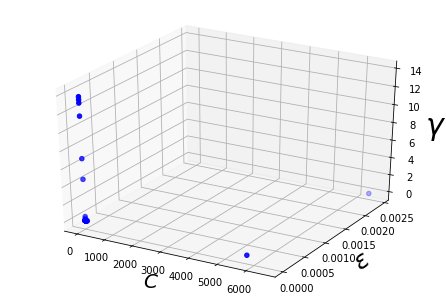






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.508114

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.596621

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.543552

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.666114

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547672

Best Configuration Found:

SVR(C=3.8091592694802308, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.33301814246704786, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



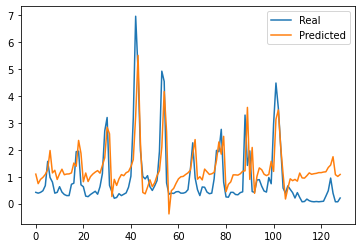


Ensemble Model series` predicitions:



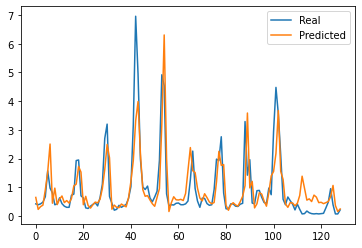


Ensemble Model best Average series` predicitions:



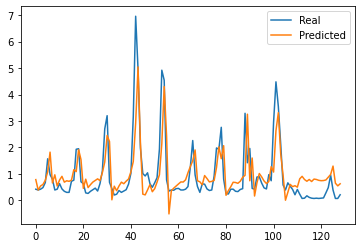


Ensemble Model K best Average series` predicitions:



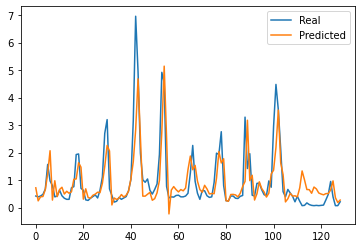


Ensemble Model best Median series` predicitions:



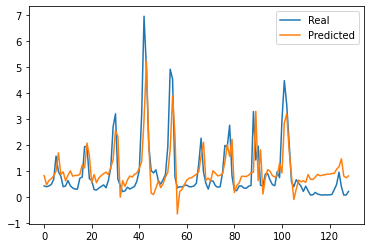


Ensemble Model K best Median series` predicitions:



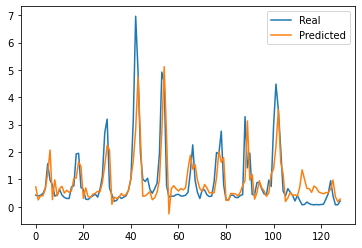






 Displaying Results for the test set



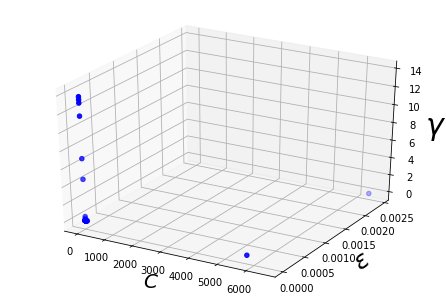






Mean Squared Error for the ARIMA Model:	 0.232631

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.076063

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.069331

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.070567

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.083006

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.078408

Best Configuration Found:

SVR(C=3.8091592694802308, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.33301814246704786, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



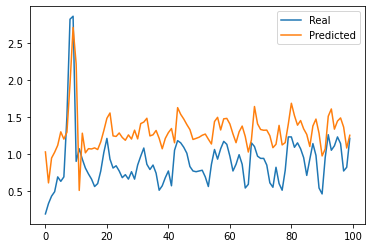


Ensemble Model series` predicitions:



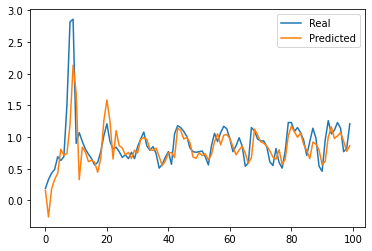


Ensemble Model best Average series` predicitions:



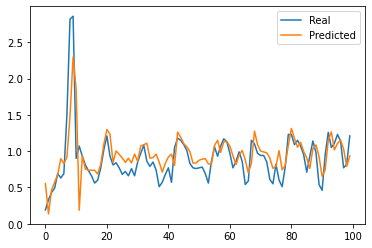


Ensemble Model K best Average series` predicitions:



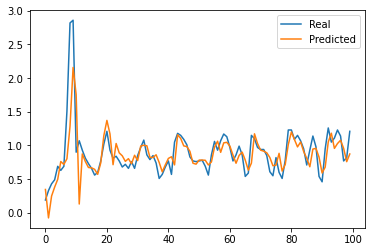


Ensemble Model best Median series` predicitions:



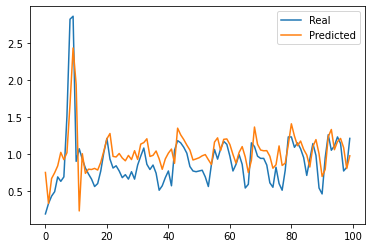


Ensemble Model K best Median series` predicitions:



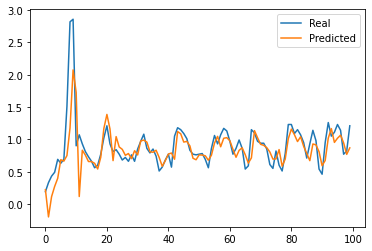






Best G-best on val set: Experiment # 4 . Mean Squared Error = 0.508114


Best G-best on test set: Experiment # 4 . Mean Squared Error = 0.076063



In [31]:
pso(120, 100, 3, 1, 30, 5)

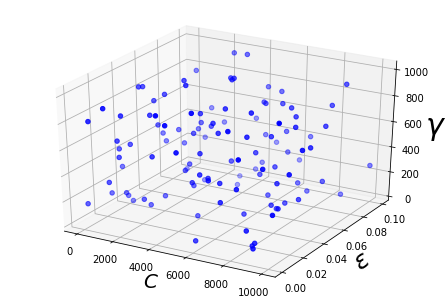






Experiment # 1: done. MSE_g_Best_val: 0.554856; MSE_AV_val: 0.558841; MSE_MD_val: 0.558961; MSE_k_AV_val: 0.557261; MSE_k_MD_val: 0.556763


MSE_g_Best: 0.093034; MSE_AV: 0.094020; MSE_MD: 0.094110; MSE_k_AV: 0.092253; MSE_k_MD: 0.092252


Experiment # 2: done. MSE_g_Best_val: 0.551615; MSE_AV_val: 0.560972; MSE_MD_val: 0.561155; MSE_k_AV_val: 0.560527; MSE_k_MD_val: 0.561155


MSE_g_Best: 0.088271; MSE_AV: 0.092518; MSE_MD: 0.092252; MSE_k_AV: 0.092223; MSE_k_MD: 0.092252


Experiment # 3: done. MSE_g_Best_val: 0.547940; MSE_AV_val: 0.590571; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.549601; MSE_k_MD_val: 0.548378


MSE_g_Best: 0.082806; MSE_AV: 0.068565; MSE_MD: 0.083006; MSE_k_AV: 0.066619; MSE_k_MD: 0.062574


Experiment # 4: done. MSE_g_Best_val: 0.547946; MSE_AV_val: 0.578015; MSE_MD_val: 0.606361; MSE_k_AV_val: 0.549627; MSE_k_MD_val: 0.549312


MSE_g_Best: 0.083212; MSE_AV: 0.068848; MSE_MD: 0.064781; MSE_k_AV: 0.068157; MSE_k_MD: 0.064782


Experiment # 5: done. MSE_g_Best_va

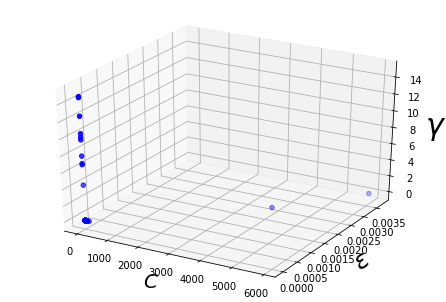






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547940

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.590571

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.549601

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.666114

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548378

Best Configuration Found:

SVR(C=28.24406724852459, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



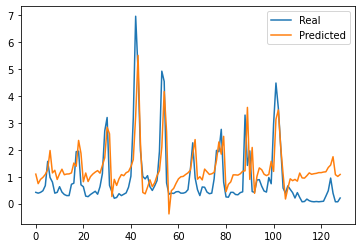


Ensemble Model series` predicitions:



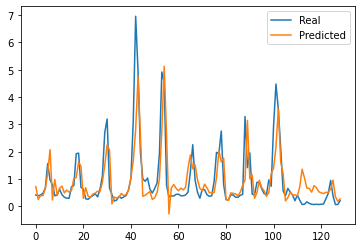


Ensemble Model best Average series` predicitions:



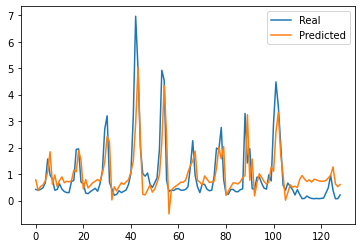


Ensemble Model K best Average series` predicitions:



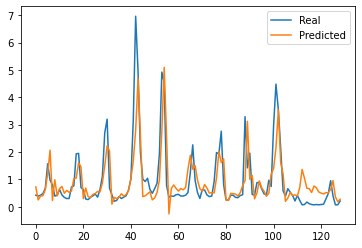


Ensemble Model best Median series` predicitions:



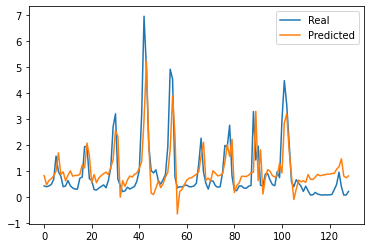


Ensemble Model K best Median series` predicitions:



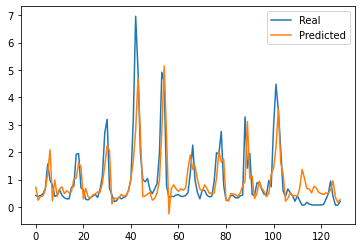






 Displaying Results for the test set



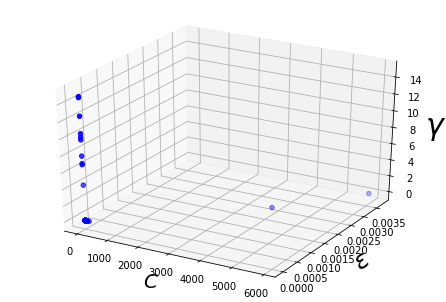






Mean Squared Error for the ARIMA Model:	 0.232631

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.082806

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.068565

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.066619

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.083006

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.062574

Best Configuration Found:

SVR(C=28.24406724852459, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



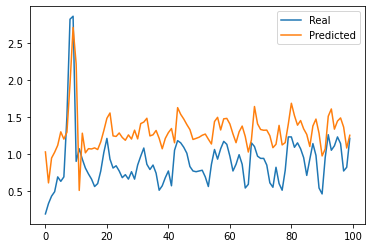


Ensemble Model series` predicitions:



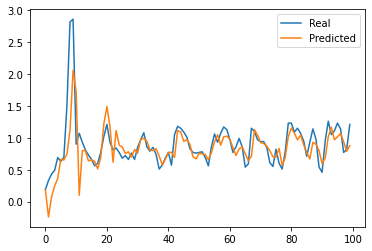


Ensemble Model best Average series` predicitions:



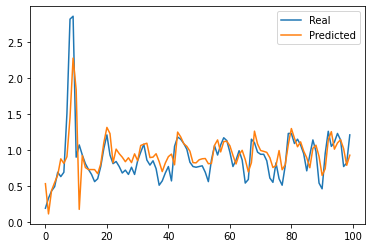


Ensemble Model K best Average series` predicitions:



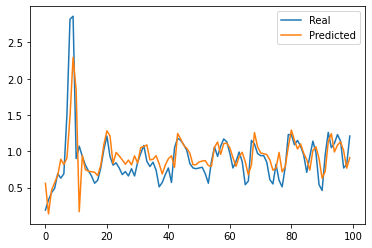


Ensemble Model best Median series` predicitions:



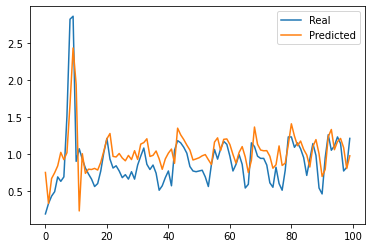


Ensemble Model K best Median series` predicitions:



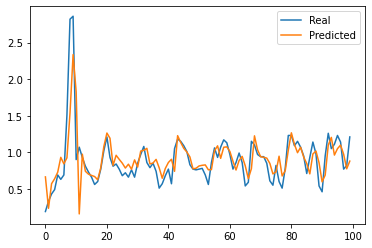






Best G-best on val set: Experiment # 3 . Mean Squared Error = 0.547940


Best G-best on test set: Experiment # 3 . Mean Squared Error = 0.082806



In [32]:
pso(120, 100, 3, 1, 40, 5)

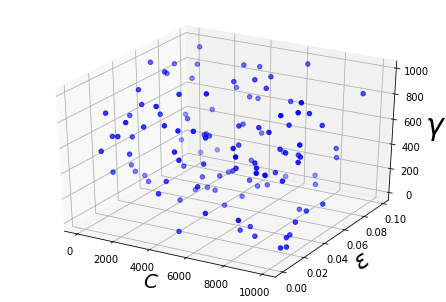






Experiment # 1: done. MSE_g_Best_val: 0.554805; MSE_AV_val: 0.558692; MSE_MD_val: 0.558544; MSE_k_AV_val: 0.557414; MSE_k_MD_val: 0.557089


MSE_g_Best: 0.093241; MSE_AV: 0.094201; MSE_MD: 0.094250; MSE_k_AV: 0.092699; MSE_k_MD: 0.092252


Experiment # 2: done. MSE_g_Best_val: 0.547956; MSE_AV_val: 0.596110; MSE_MD_val: 0.666114; MSE_k_AV_val: 0.549779; MSE_k_MD_val: 0.548041


MSE_g_Best: 0.082716; MSE_AV: 0.069512; MSE_MD: 0.083006; MSE_k_AV: 0.068826; MSE_k_MD: 0.083006


Experiment # 3: done. MSE_g_Best_val: 0.554850; MSE_AV_val: 0.558565; MSE_MD_val: 0.558701; MSE_k_AV_val: 0.557205; MSE_k_MD_val: 0.556516


MSE_g_Best: 0.093579; MSE_AV: 0.094112; MSE_MD: 0.094272; MSE_k_AV: 0.092595; MSE_k_MD: 0.092252


Experiment # 4: done. MSE_g_Best_val: 0.547940; MSE_AV_val: 0.571013; MSE_MD_val: 0.555647; MSE_k_AV_val: 0.549898; MSE_k_MD_val: 0.549349


MSE_g_Best: 0.082805; MSE_AV: 0.068952; MSE_MD: 0.070743; MSE_k_AV: 0.070915; MSE_k_MD: 0.083006


Experiment # 5: done. MSE_g_Best_va

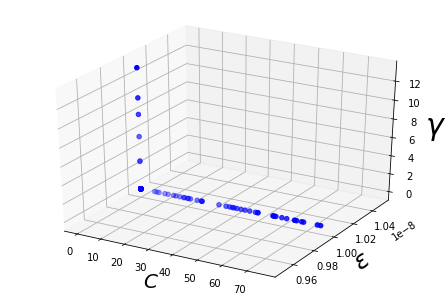






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547940

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.571013

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.549898

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.555647

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.549349

Best Configuration Found:

SVR(C=29.016974462913684, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



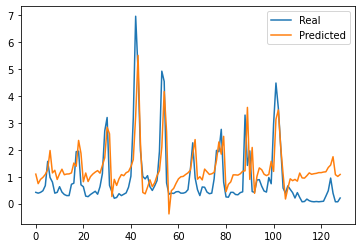


Ensemble Model series` predicitions:



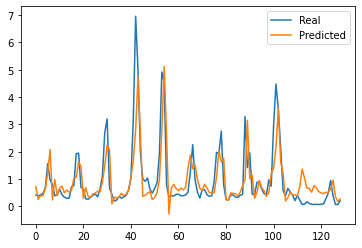


Ensemble Model best Average series` predicitions:



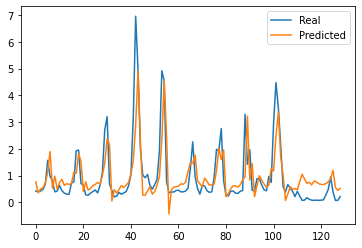


Ensemble Model K best Average series` predicitions:



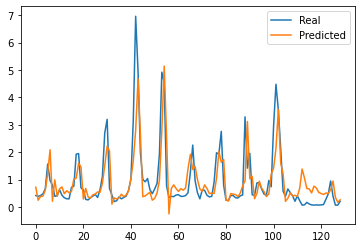


Ensemble Model best Median series` predicitions:



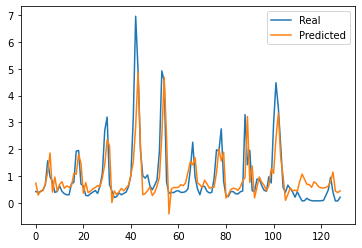


Ensemble Model K best Median series` predicitions:



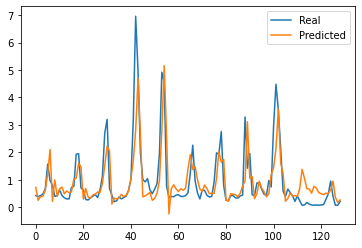






 Displaying Results for the test set



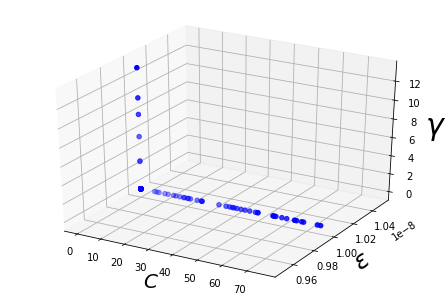






Mean Squared Error for the ARIMA Model:	 0.232631

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.082716

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.069512

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.068826

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.083006

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.083006

Best Configuration Found:

SVR(C=29.016974462913684, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



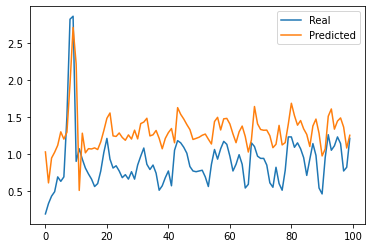


Ensemble Model series` predicitions:



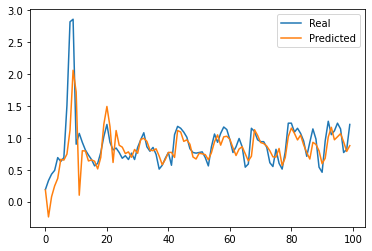


Ensemble Model best Average series` predicitions:



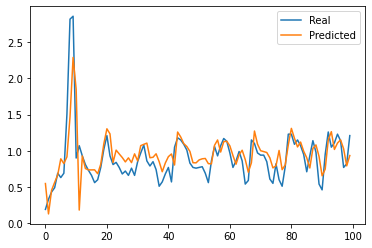


Ensemble Model K best Average series` predicitions:



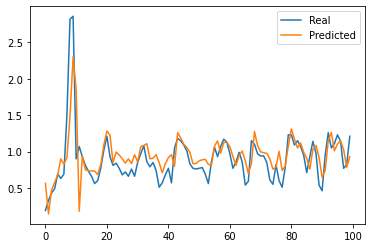


Ensemble Model best Median series` predicitions:



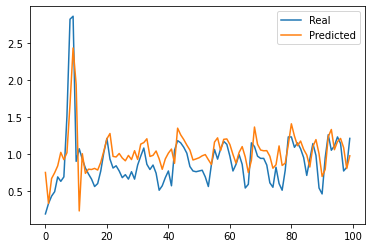


Ensemble Model K best Median series` predicitions:



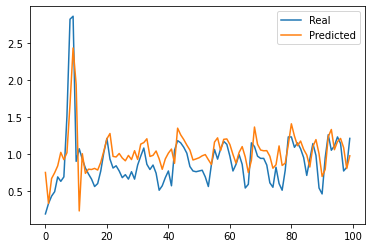






Best G-best on val set: Experiment # 4 . Mean Squared Error = 0.547940


Best G-best on test set: Experiment # 2 . Mean Squared Error = 0.082716



In [33]:
pso(120, 100, 3, 1, 50, 5)

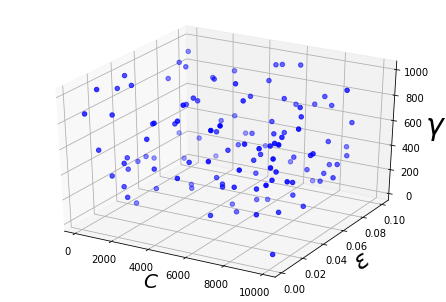






Experiment # 1: done. MSE_g_Best_val: 0.554502; MSE_AV_val: 0.558790; MSE_MD_val: 0.559266; MSE_k_AV_val: 0.557483; MSE_k_MD_val: 0.556961


MSE_g_Best: 0.093214; MSE_AV: 0.094021; MSE_MD: 0.094024; MSE_k_AV: 0.092689; MSE_k_MD: 0.092252


Experiment # 2: done. MSE_g_Best_val: 0.554923; MSE_AV_val: 0.558502; MSE_MD_val: 0.558513; MSE_k_AV_val: 0.557368; MSE_k_MD_val: 0.557115


MSE_g_Best: 0.093423; MSE_AV: 0.094311; MSE_MD: 0.094484; MSE_k_AV: 0.093091; MSE_k_MD: 0.092757


Experiment # 3: done. MSE_g_Best_val: 0.554497; MSE_AV_val: 0.558594; MSE_MD_val: 0.558635; MSE_k_AV_val: 0.557435; MSE_k_MD_val: 0.556985


MSE_g_Best: 0.092600; MSE_AV: 0.094135; MSE_MD: 0.094277; MSE_k_AV: 0.092887; MSE_k_MD: 0.092320


Experiment # 4: done. MSE_g_Best_val: 0.507912; MSE_AV_val: 0.557503; MSE_MD_val: 0.561155; MSE_k_AV_val: 0.557374; MSE_k_MD_val: 0.560189


MSE_g_Best: 0.084267; MSE_AV: 0.090903; MSE_MD: 0.092252; MSE_k_AV: 0.088085; MSE_k_MD: 0.092252


Experiment # 5: done. MSE_g_Best_va

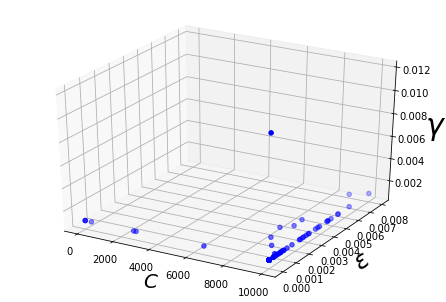






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.507912

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.557503

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.557374

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.561155

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.560189

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.011979562588299957, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



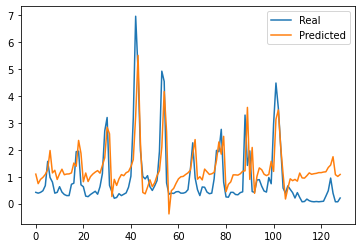


Ensemble Model series` predicitions:



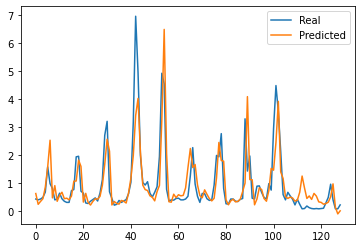


Ensemble Model best Average series` predicitions:



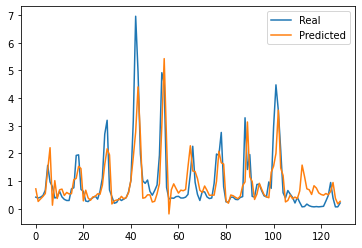


Ensemble Model K best Average series` predicitions:



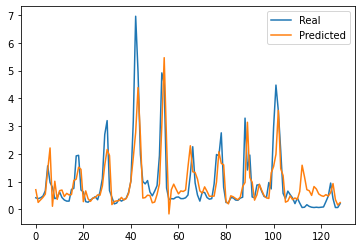


Ensemble Model best Median series` predicitions:



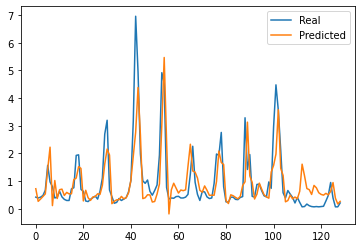


Ensemble Model K best Median series` predicitions:



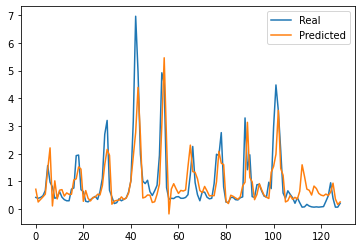






 Displaying Results for the test set



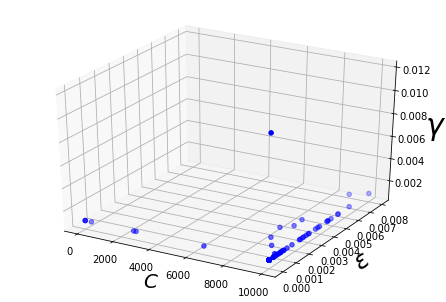






Mean Squared Error for the ARIMA Model:	 0.232631

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.084267

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.090903

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.088085

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.092252

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.092252

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.011979562588299957, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



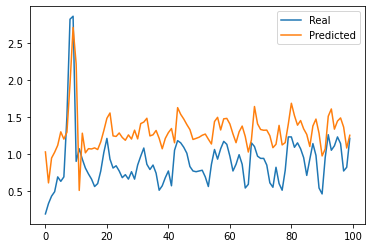


Ensemble Model series` predicitions:



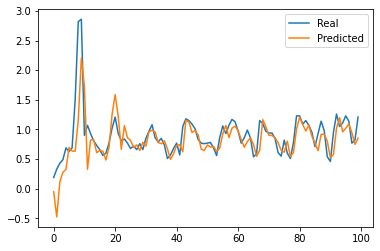


Ensemble Model best Average series` predicitions:



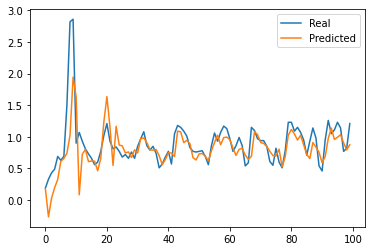


Ensemble Model K best Average series` predicitions:



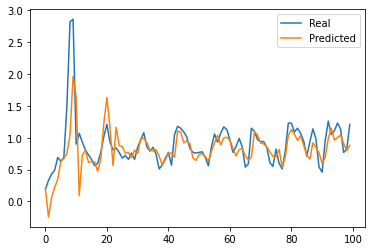


Ensemble Model best Median series` predicitions:



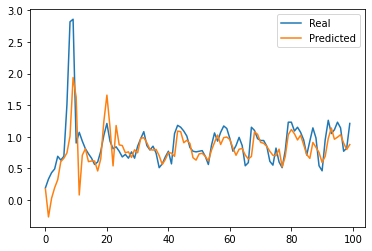


Ensemble Model K best Median series` predicitions:



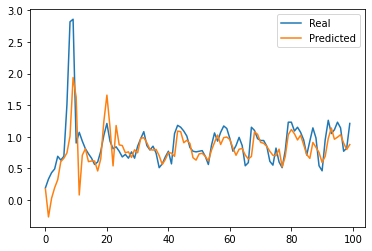






Best G-best on val set: Experiment # 4 . Mean Squared Error = 0.507912


Best G-best on test set: Experiment # 4 . Mean Squared Error = 0.084267



In [34]:
pso(120, 100, 3, 1, 60, 5)